In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import joblib

# --- Load and preprocess data ---
df = pd.read_csv("cleaned_dataset.csv")
X = df.drop("quality", axis=1)
y = df["quality"]

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# --- Clustering Models ---
results = {}

# KMeans with k=6
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
results["KMeans"] = silhouette_score(X_scaled, kmeans_labels)

# Agglomerative with k=6
agglo = AgglomerativeClustering(n_clusters=6)
agglo_labels = agglo.fit_predict(X_scaled)
results["Agglomerative"] = silhouette_score(X_scaled, agglo_labels)

# DBSCAN (needs tuning)
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
if len(set(dbscan_labels)) > 1:  # valid clustering
    results["DBSCAN"] = silhouette_score(X_scaled, dbscan_labels)
else:
    results["DBSCAN"] = -1  # invalid

# --- Select best model ---
best_model_name = max(results, key=results.get)
print("Silhouette Scores:", results)
print("Best Model:", best_model_name)

# Save best model + scaler
if best_model_name == "KMeans":
    best_model = kmeans
elif best_model_name == "Agglomerative":
    best_model = agglo
else:
    best_model = dbscan

joblib.dump(best_model, "best_cluster_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Saved best model & scaler")


c:\Users\boomi\anaconda3\envs\pyai\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Silhouette Scores: {'KMeans': 0.17574906453166592, 'Agglomerative': 0.15888351401766018, 'DBSCAN': 0.3162745246991103}
Best Model: DBSCAN
✅ Saved best model & scaler


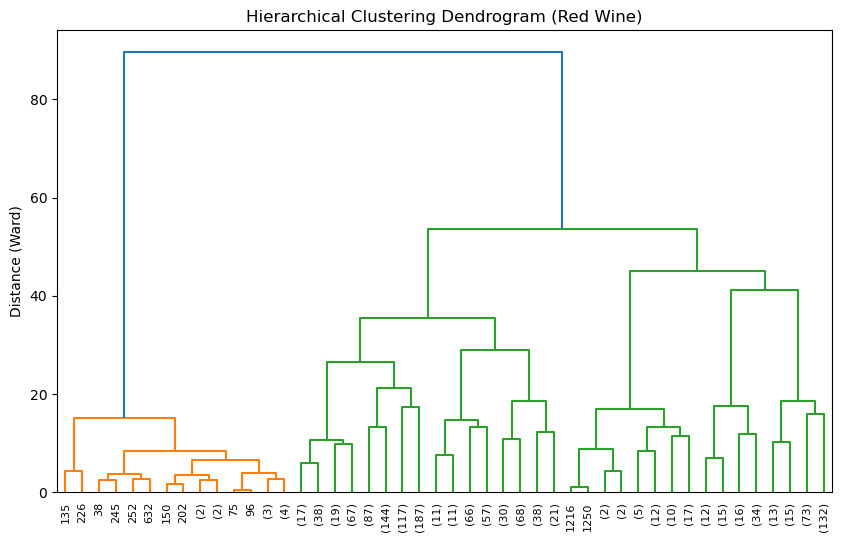

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X_scaled, method='ward')


plt.figure(figsize=(10, 6))
hierarchy.dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Red Wine)")
plt.ylabel("Distance (Ward)")
plt.show()
